In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch
from torch.nn import *

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 224, 224)
    
def crop_l(image):
    return crop(image, 4, 4, 224, 224)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/TUM'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
weights = models.ViT_B_16_Weights
model = models.vit_b_16(weights=weights)
model

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
def rightpt(train_loader_r, min_, max_, aux_):
  for i, data in enumerate(train_loader_r):
      if i > min_:
        inputs, labels = data
        outputs = model(inputs)
        output_.append(outputs)
        if i > max_:
          return output_


In [ ]:
def leftpt(train_loader_l, min_, max_, aux_,output_):
  for i,data in enumerate(train_loader_l):
    if i > min_:
      inputs, labels = data
      outputs = model(inputs)
      output_[i-aux_] = torch.cat((output_[i-aux_], outputs), 1)
      if i > max_:
          return output_
           

In [ ]:
for n_it in range(1,280):
  output_ = []
  output_new = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*30
    max_ = n_it*30
    aux_ = min_ +1
    output_ = rightpt(train_loader_r, min_, max_, aux_)
    output_new = leftpt(train_loader_l, min_, max_, aux_, output_)
    out_path = '/content/drive/MyDrive/Datasets/tensors_tum_visiontransformer1/tensors'+str(n_it)+'.pt'
    torch.save(output_new,out_path)
  except:
    print('error')


error


In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 10)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:
database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55,database56,database57,database58,database59,database60,
            database61,database62,database63,database64,database65,database66,database67,database68,database69,database70,
            database71,database72,database73,database74,database75,database76,database77,database78,database79,database80,
            database81,database82,database83,database84,database85,database86,database87,database88,database89,database90,
            database91,database92,database93,database94,database95,database96,database97,database98,database99,database100,
            database101,database102,database103,database104,database105,database106,database107,database108,database109,database110,
            database111,database112,database113,database114,database115,database116,database117,database118,database119,database120,
            database121,database122,database123,database124,database125,database126,database127,database128,database129,database130,
            database131,database132,database133,database134,database135,database136,database137,database138,database139,database140,
            database141,database142,database143,database144,database145,database146,database147,database148,database149,database150,
            database151,database152,database153,database155,database156,database157,database158,database159,database160,
            database161,database162,database163,database164,database165]
d = []

In [ ]:
c = 0
for d in database1:
    distance = torch.cdist(d, database1[0], p=2)
    max_dist = torch.max(distance)
    print('image: {}, distance: {}'.format(c, max_dist))
    c += 1

image: 0, distance: 0.0
image: 1, distance: 11.303543090820312
image: 2, distance: 11.948253631591797
image: 3, distance: 13.086612701416016
image: 4, distance: 13.535451889038086
image: 5, distance: 14.135660171508789
image: 6, distance: 14.697111129760742
image: 7, distance: 14.110370635986328
image: 8, distance: 17.10672950744629
image: 9, distance: 17.041841506958008
image: 10, distance: 17.493322372436523
image: 11, distance: 18.531984329223633
image: 12, distance: 18.534624099731445
image: 13, distance: 17.8424072265625
image: 14, distance: 16.319812774658203
image: 15, distance: 15.072478294372559
image: 16, distance: 15.445765495300293
image: 17, distance: 15.256281852722168
image: 18, distance: 15.400327682495117
image: 19, distance: 15.338836669921875
image: 20, distance: 16.67545509338379
image: 21, distance: 17.017162322998047
image: 22, distance: 16.813262939453125
image: 23, distance: 17.383285522460938
image: 24, distance: 18.265422821044922
image: 25, distance: 16.99683

In [ ]:
co = 0
for bg in database:
  
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      with open('/content/drive/MyDrive/Datasets/TUM_/loop_tum_visiontransformer_v1.txt', 'a') as txt_file:
        if loop_ > 0:
          txt_file.write('Found loop')
          image_number = round(((co*30)+i)/2,0)
          txt_file.write('\n image: '+str(image_number))
          txt_file.write('\n')
        else:
          d.append(data)
  co += 1


A saída de streaming foi truncada nas últimas 5000 linhas.
tensor([[ 0.2488,  0.0551, -1.0840,  ..., -0.1204, -0.2044, -0.4493]],
       requires_grad=True)
loop
tensor([[ 0.2488,  0.0551, -1.0840,  ..., -0.1204, -0.2044, -0.4493]],
       requires_grad=True)
loop
tensor([[ 0.2440, -0.0363, -1.2436,  ..., -0.2068, -0.4733, -0.4061]],
       requires_grad=True)
loop
tensor([[ 0.2173, -0.1554, -1.3573,  ..., -0.2006, -0.4981, -0.3024]],
       requires_grad=True)
loop
tensor([[ 0.2173, -0.1554, -1.3573,  ..., -0.2006, -0.4981, -0.3024]],
       requires_grad=True)
loop
tensor([[ 0.1254, -0.1584, -1.3108,  ..., -0.1273, -0.4776, -0.3716]],
       requires_grad=True)
loop
tensor([[ 0.2488,  0.0551, -1.0840,  ..., -0.1204, -0.2044, -0.4493]],
       requires_grad=True)
loop
tensor([[ 0.2440, -0.0363, -1.2436,  ..., -0.2068, -0.4733, -0.4061]],
       requires_grad=True)
loop
tensor([[ 0.2488,  0.0551, -1.0840,  ..., -0.1204, -0.2044, -0.4493]],
       requires_grad=True)
loop
tensor([[ 0.24

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/tum_visiontransformer.csv')


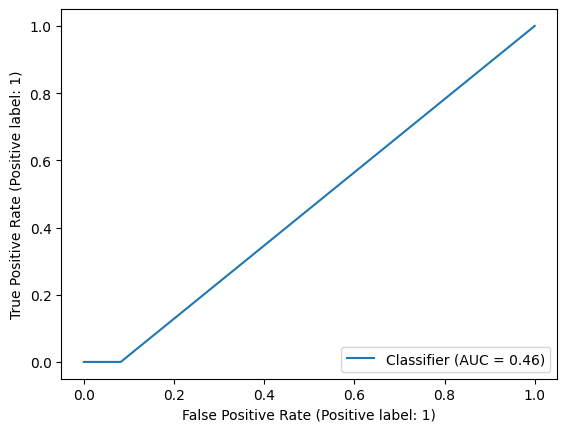

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.45903153450323264
Accuracy:  0.8383132530120482
f1:  0.0


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[6958,  621],
       [ 721,    0]])